# Example of PCA usage with [MNIST dataset](https://www.python-course.eu/neural_network_mnist.php)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import DimReduction

This example uses reduced version of MNIST with only 10 examples.

In [2]:
data = np.loadtxt("mnist_small.csv", delimiter = ",")
Y = data[:, 0]
X = data[:, 1:]
image_size = 28 # 28*28 pixel images
print(X.shape)

(10, 784)


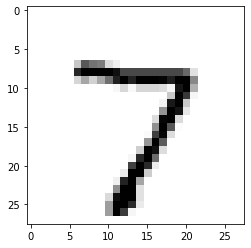

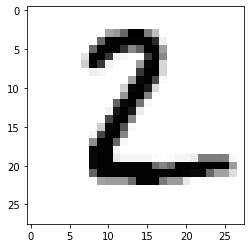

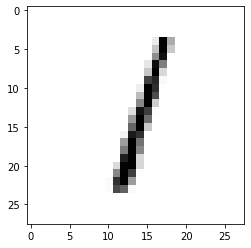

In [3]:
for i in range(3):
    plt.figure()
    plt.imshow(X[i].reshape(image_size, image_size), cmap="Greys")

Data should be normalized before using PCA.

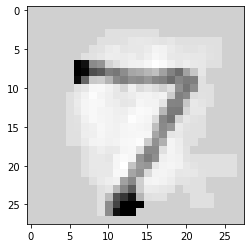

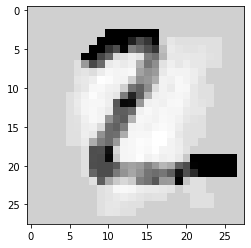

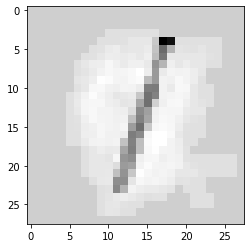

In [4]:
X_norm, scales = DimReduction.Normalize(X)
for i in range(3):
    plt.figure()
    plt.imshow(X_norm[i].reshape(image_size, image_size), cmap="Greys")

Apply principal component analysis.

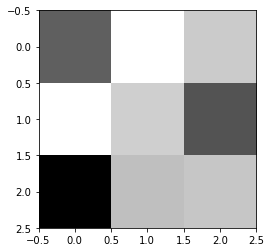

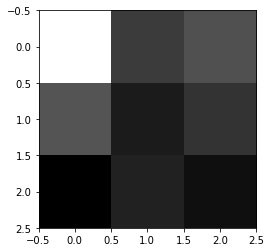

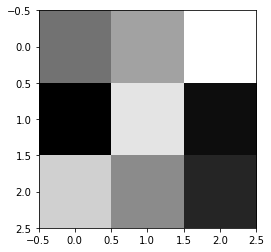

In [5]:
new_size = 3 # reduced images will be 3*3 pixel
Z, U = DimReduction.PCA(X_norm, k = new_size**2)
for i in range(3):
    plt.figure()
    plt.imshow(Z[i].reshape(new_size, new_size), cmap="Greys")

Compare initial images with restored.

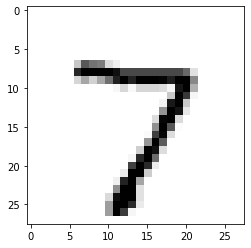

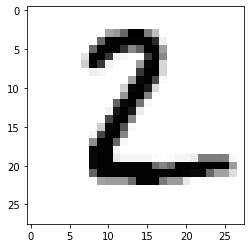

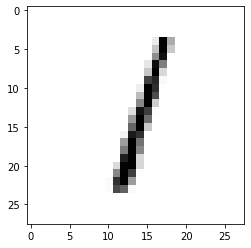

In [6]:
X_approx = (Z @ U.T)*scales['std'] + scales['mean']
for i in range(3):
    plt.figure()
    plt.imshow(X_approx[i].reshape(image_size, image_size), cmap="Greys")

Note: if initial images are reduced to 2*2, restored ones will look much worse.

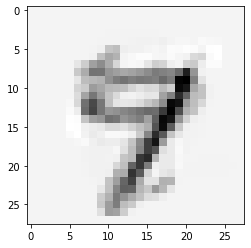

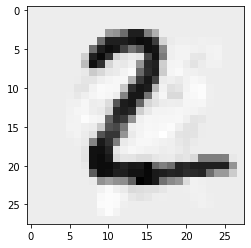

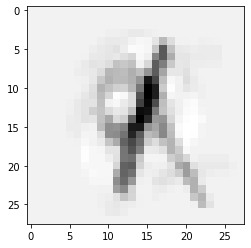

In [7]:
X_norm, scales = DimReduction.Normalize(X)
Z, U = DimReduction.PCA(X_norm, k = 2**2)
X_approx = (Z @ U.T)*scales['std'] + scales['mean']
for i in range(3):
    plt.figure()
    plt.imshow(X_approx[i].reshape(image_size, image_size), cmap="Greys")